In [94]:
import numpy as np
import matplotlib.pyplot as plt

def square(amp,offset,period,density,start,end):
    length = (end-start)*density
    y = np.zeros(length,float)
    y.fill(offset)
    for x in range(length):
        x -= start
        if (x/density)%period < period/2:
            y[x] += amp
        else:
            y[x] -= amp
    x = np.linspace(start,end,(end-start)*density)
    return x,y


def integrate(x,y):
    length = len(x)-1
    total = 0
    for i in range(length):
        total += (x[i+1]-x[i]) * (y[i]+y[i+1])
    return total/2

def fourier(y):
    length = len(y)
    x = np.arange(0,len(y))
    an, bn = np.zeros(int(length/2), np.float64), np.zeros(int(length/2), np.float64)
    an[0] = sum(y)
    for i in range(1,int(length/2)):
        an[i] = (np.dot(y,np.cos(2*np.pi/len(y)*i*x)))
        bn[i] = (np.dot(y,np.sin(2*np.pi/len(y)*i*x)))
    return np.array([an/length*2,bn/length*2])

Text(0, 0.5, 'temperature(°C)')

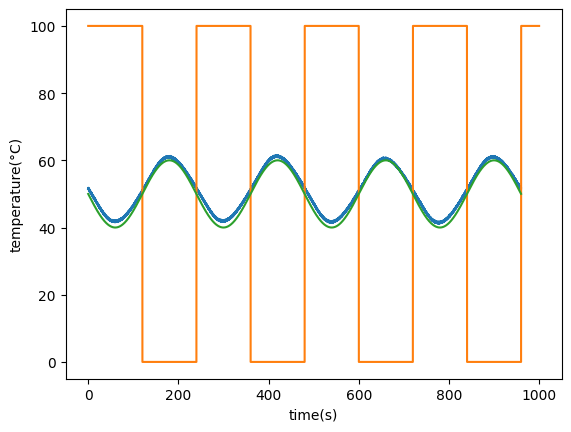

In [17]:
x1, y1 = np.loadtxt("thermal_4min_a.txt", unpack=True, skiprows=3)
plt.plot(x1/10,y1)

x2, y2 = square(50,50,240,100,0,1000)
plt.plot(x2,y2)



def sin(x,amp,phase,offset):
    return amp*np.sin(2*np.pi/2400*x+phase)+offset

plt.plot(x1/10,sin(x1,10,np.pi,50))
plt.xlabel("time(s)")
plt.ylabel("temperature(°C)")


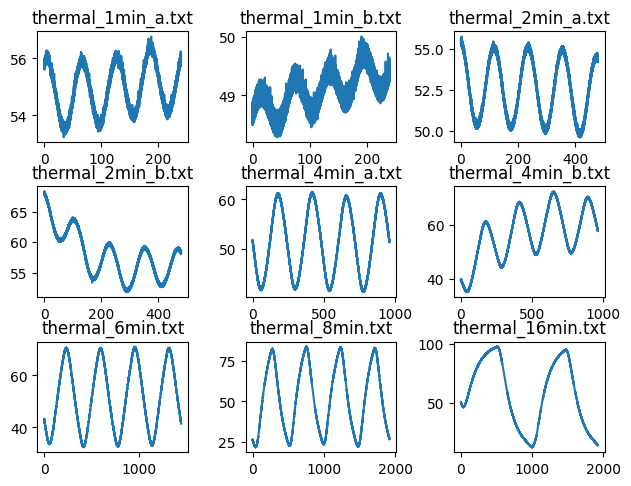

In [3]:
import os
fig, ax = plt.subplots(3,3)
fig.tight_layout()

num = 0
for file in os.listdir()[2:] + [os.listdir()[1]]:
    if file[-4:] == ".txt":
        x, y = np.loadtxt(file, unpack=True, skiprows=3)
        ax[num//3,num%3].plot(x/10,y)
        ax[num//3,num%3].set_title(file)
        num +=1



Text(0.5, 1.0, '1 minute')

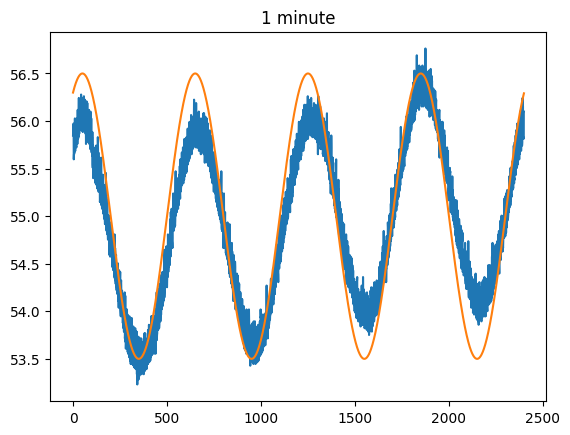

In [49]:
def sin(x,amp,phase,period,offset):
    return amp*np.sin(2*np.pi/period*x+phase)+offset
x1, y1 = np.loadtxt("thermal_1min_a.txt", unpack=True, skiprows=3)
y2 = sin(x1,1.5,np.pi/3,600,55)
plt.plot(x1,y1)
plt.plot(y2)
plt.title("1 minute")


Text(0.5, 1.0, '2 minute')

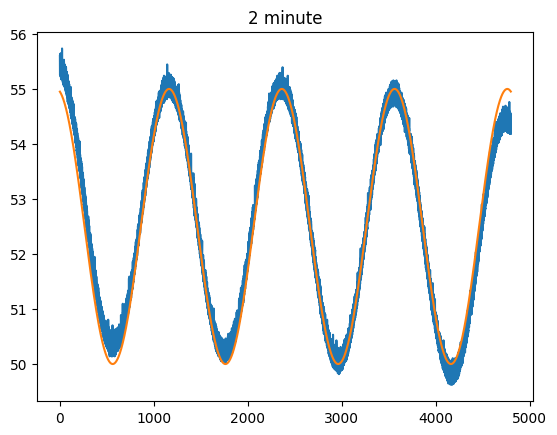

In [32]:
def sin(x,amp,phase,period,offset):
    return amp*np.sin(2*np.pi/period*x+phase)+offset
x1, y1 = np.loadtxt("thermal_2min_a.txt", unpack=True, skiprows=3)
y2 = sin(x1,2.5,np.pi/2+0.2,1200,52.5)
plt.plot(x1,y1)
plt.plot(y2)
plt.title("2 minute")

Text(0.5, 1.0, '6 minute')

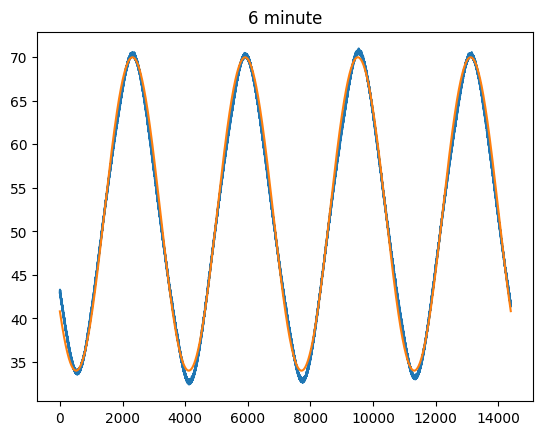

In [41]:
def sin(x,amp,phase,period,offset):
    return amp*np.sin(2*np.pi/period*x+phase)+offset
x1, y1 = np.loadtxt("thermal_6min.txt", unpack=True, skiprows=3)
y2 = sin(x1,18,3*np.pi/2-0.9,3600,52)
plt.plot(x1,y1)
plt.plot(y2)
plt.title("6 minute")

Text(0.5, 1.0, '8 minute')

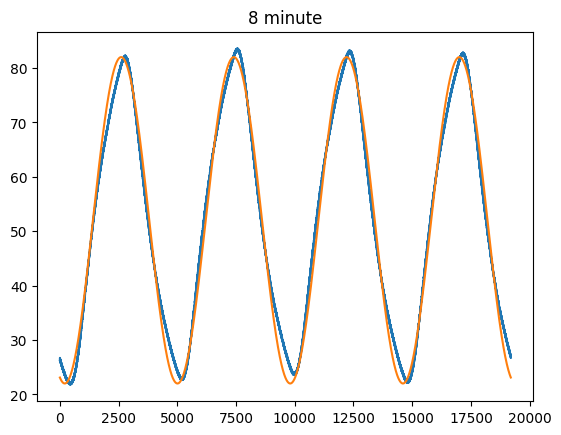

In [48]:
def sin(x,amp,phase,period,offset):
    return amp*np.sin(2*np.pi/period*x+phase)+offset
x1, y1 = np.loadtxt("thermal_8min.txt", unpack=True, skiprows=3)
y2 = sin(x1,30,np.pi+1.3,4800,52)
plt.plot(x1,y1)
plt.plot(y2)
plt.title("8 minute")

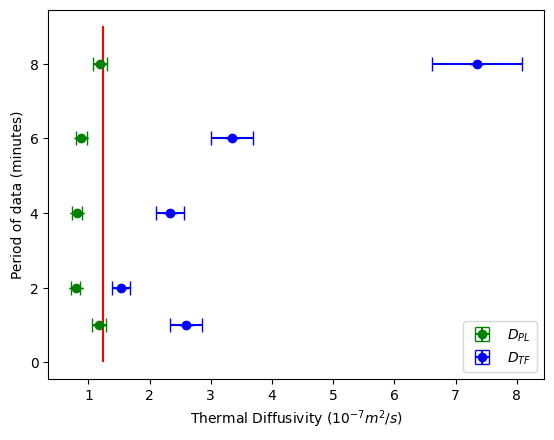

In [87]:

plt.errorbar(1.17,1,0,0.12,"o",capsize=5,color="green",label="$D_{PL}$")
plt.errorbar(0.79,2,0,0.08,"o",capsize=5,color="green")
plt.errorbar(0.81,4,0,0.08,"o",capsize=5,color="green")
plt.errorbar(0.88,6,0,0.09,"o",capsize=5,color="green")
plt.errorbar(1.19,8,0,0.12,"o",capsize=5,color="green")

plt.errorbar(2.6,1,0,0.26,"o",capsize=5,color="blue",label="$D_{TF}$")
plt.errorbar(1.53,2,0,0.15,"o",capsize=5,color="blue")
plt.errorbar(2.34,4,0,0.23,"o",capsize=5,color="blue")
plt.errorbar(3.35,6,0,0.34,"o",capsize=5,color="blue")
plt.errorbar(7.35,8,0,0.73,"o",capsize=5,color="blue")

plt.vlines(1.24,0,9,"red")
plt.xlabel("Thermal Diffusivity ($10^{-7}m^2/s$)")
plt.ylabel("Period of data (minutes)")


plt.legend()

In [100]:
x1, y1 = np.loadtxt("thermal_4min_a.txt", unpack=True, skiprows=3)
an,bn = fourier(y1)[:,::4]

In [96]:
num = 9600

magnitude = np.sqrt(an[:num]**2+bn[:num]**2)

phase = np.arctan2(an[:num],bn[:num])
print(f"amplitude: {(an[4]**2+bn[4]**2)**0.5}")
print(f"phase: {phase[4]}")



amplitude: 0.009578336022489219
phase: -0.5755337730614286


Text(0.5, 1.0, 'log($\\sqrt{a_n^2+b_n^2}$)')

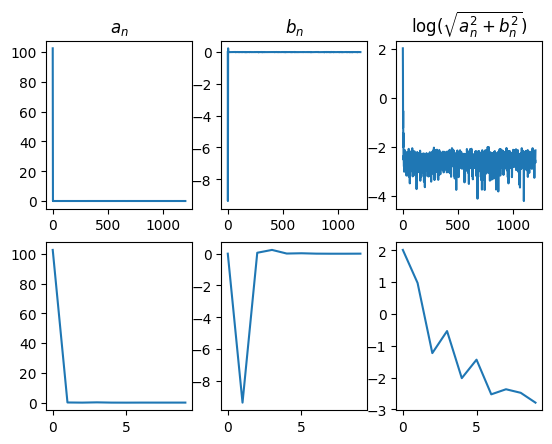

In [101]:
fig, ax = plt.subplots(2,3)
ax[0,0].plot(an)
ax[0,1].plot(bn)
ax[0,2].plot(np.log10(np.sqrt(an**2+bn**2)))
ax[1,0].plot(an[:10])
ax[1,1].plot(bn[:10])
ax[1,2].plot(np.log10(np.sqrt(an[:10]**2+bn[:10]**2)))

ax[0,0].set_title("$a_n$")
ax[0,1].set_title("$b_n$")
ax[0,2].set_title(r"log($\sqrt{a_n^2+b_n^2}$)")

In [ ]:
fig, ax = plt.subplots(2,3)
ax[0,0].plot(an)
ax[0,1].plot(bn)
ax[0,2].plot(np.log10(np.sqrt(an**2+bn**2)))
ax[1,0].plot(an[:50])
ax[1,1].plot(bn[:50])
ax[1,2].plot(np.log10(np.sqrt(an[:50]**2+bn[:50]**2)))

ax[0,0].set_title("$a_n$")
ax[0,1].set_title("$b_n$")
ax[0,2].set_title(r"log($\sqrt{a_n^2+b_n^2}$)")

Text(0.5, 1.0, 'log($\\sqrt{a_n^2+b_n^2}$)')

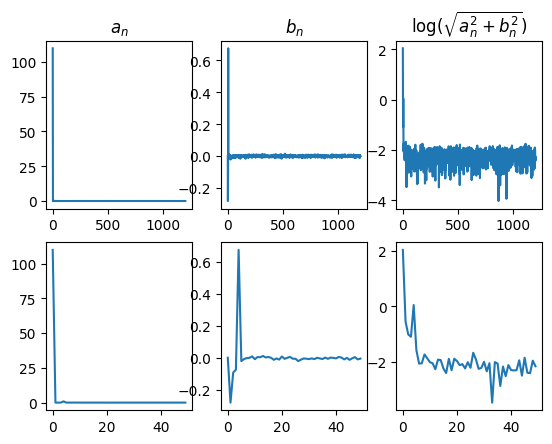

In [88]:
x1, y1 = np.loadtxt("thermal_1min_a.txt", unpack=True, skiprows=3)
an,bn = fourier(y1)


fig, ax = plt.subplots(2,3)
ax[0,0].plot(an)
ax[0,1].plot(bn)
ax[0,2].plot(np.log10(np.sqrt(an**2+bn**2)))
ax[1,0].plot(an[:50])
ax[1,1].plot(bn[:50])
ax[1,2].plot(np.log10(np.sqrt(an[:50]**2+bn[:50]**2)))

ax[0,0].set_title("$a_n$")
ax[0,1].set_title("$b_n$")
ax[0,2].set_title(r"log($\sqrt{a_n^2+b_n^2}$)")